In [2]:
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt

def clusterMap(adata, color='leiden', ax=None):
    sc.pl.embedding(adata, "spatial", color=color, s=20, ax=ax, show=False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_aspect('equal')
    ax.set_facecolor('white')

In [3]:
adata = ad.read_h5ad('adata_tumor.h5ad')

/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


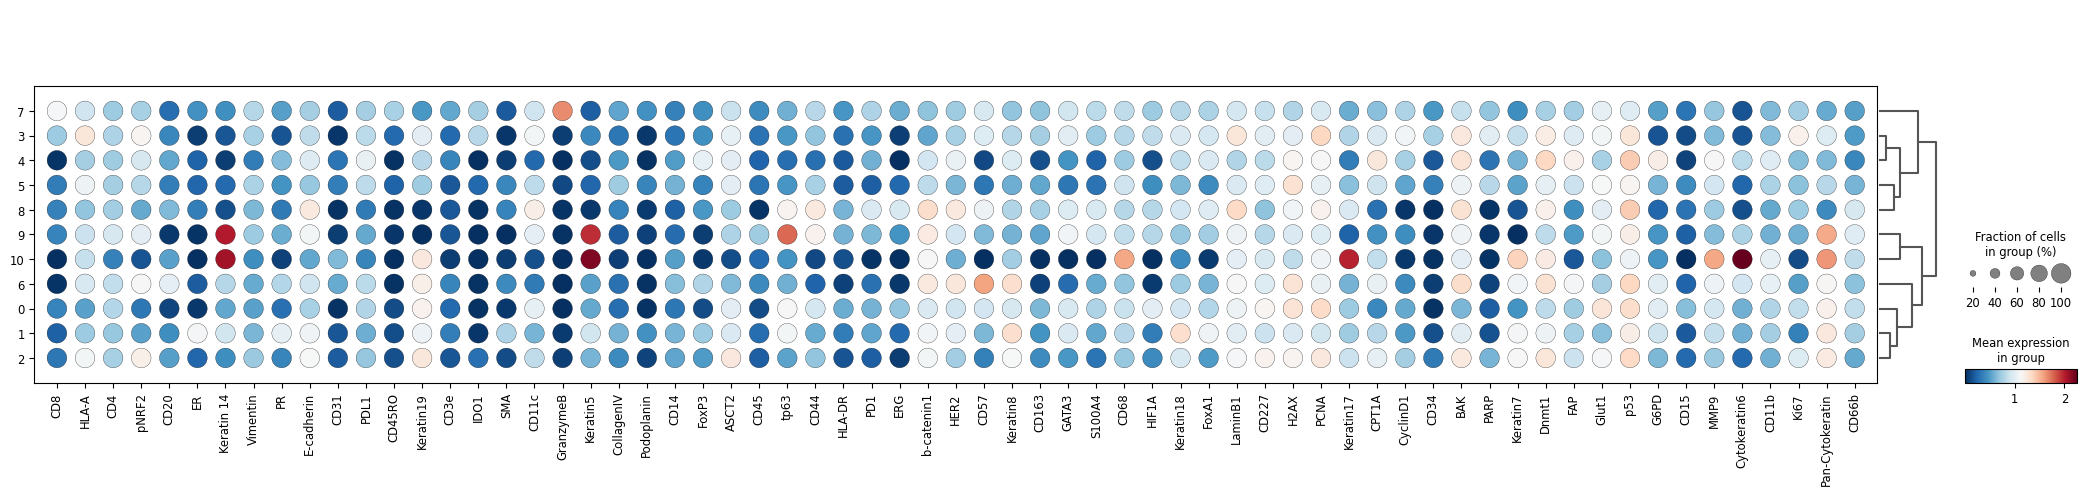

In [4]:
sc.pl.dotplot(adata, adata.var_names.to_list(), groupby='leiden_0.25', dendrogram=True, log=True, cmap='RdBu_r')

In [12]:
adata_0 = adata[adata.obs['leiden_0.25']=='0']
print(adata_0)

View of AnnData object with n_obs × n_vars = 733564 × 65
    obs: 'imagecol', 'imagerow', 'cellSize', 'batch', 'phenotype', 'leiden_0.5', 'leiden_1', 'leiden_2', 'leiden_0.25'
    var: 'mean', 'std'
    uns: 'batch_colors', 'leiden', 'leiden_0.25_colors', 'leiden_0.5_colors', 'neighbors', 'pca', 'spatial', 'umap', 'dendrogram_leiden_0.25'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:163: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = dat
/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


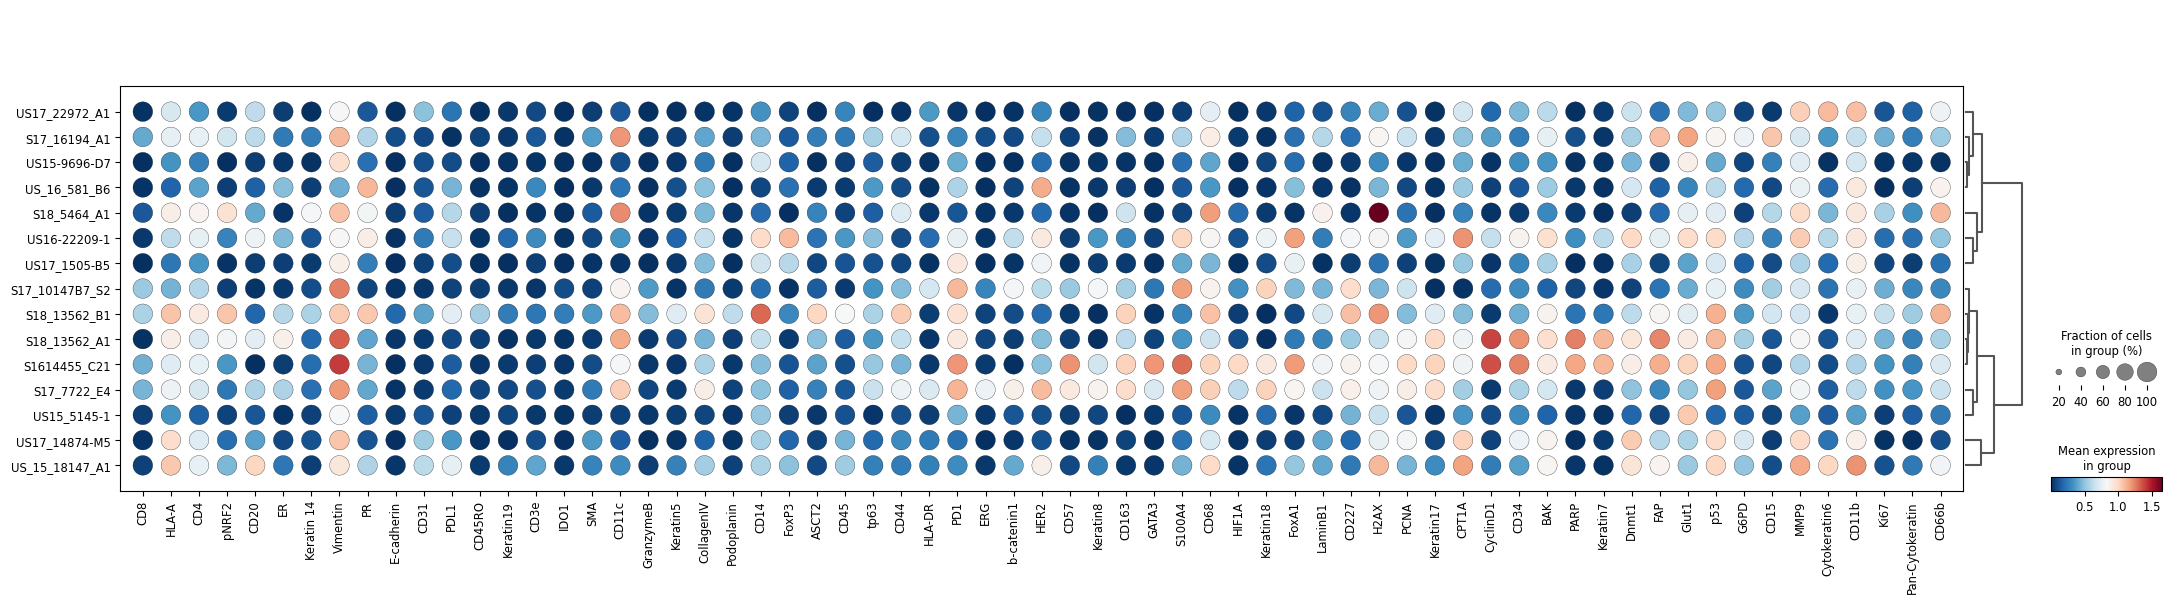

In [13]:
sc.pl.dotplot(adata_0, adata_0.var_names.to_list(), groupby='batch', dendrogram=True, log=True, cmap='RdBu_r')

/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWar

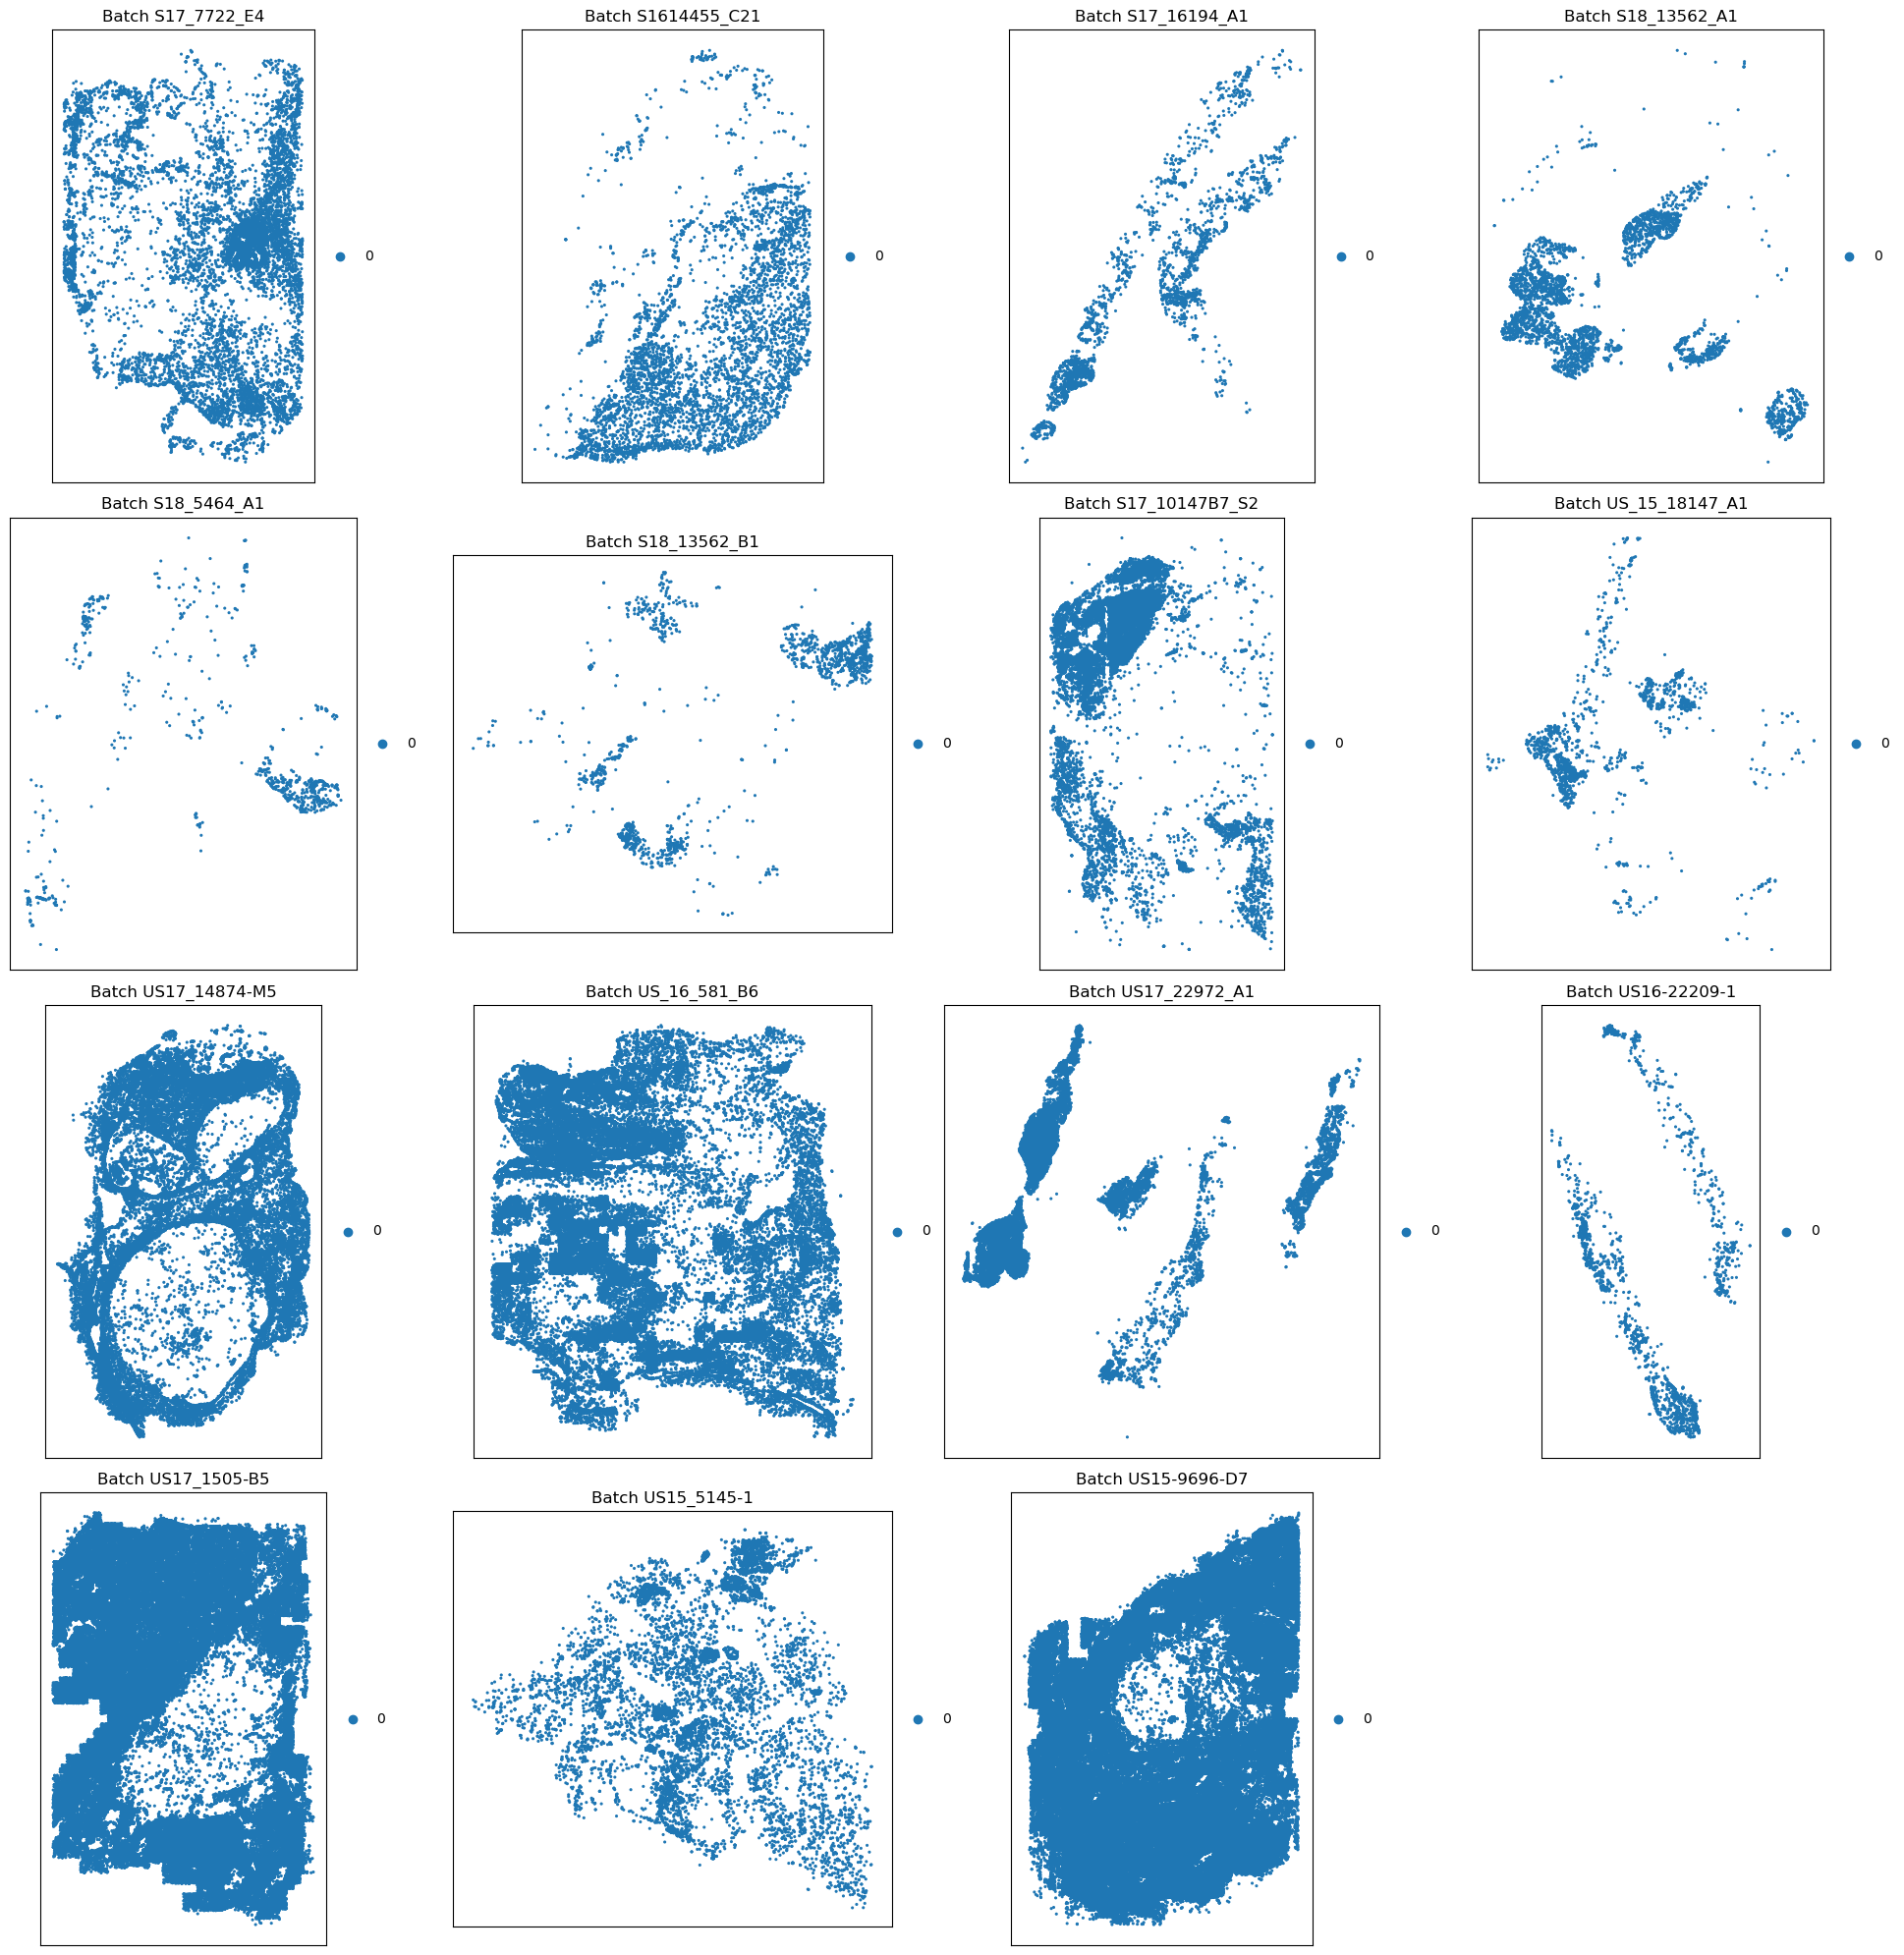

In [11]:
# Get unique batches
batches = adata.obs['batch'].unique()

# Determine the grid size
num_batches = len(batches)
grid_size = (4, 4)  # Adjust this based on the number of batches and your preference

fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(20, 20))

# Loop through the batches and create subplots
for i, batch in enumerate(batches):
    row = i // grid_size[1]
    col = i % grid_size[1]
    ax = axes[row, col]
    clusterMap(adata_0[adata_0.obs['batch'] == batch], color='leiden_0.25', ax=ax)
    ax.set_title(f'Batch {batch}')

# Turn off axes for any remaining empty subplots
for j in range(num_batches, grid_size[0] * grid_size[1]):
    row = j // grid_size[1]
    col = j % grid_size[1]
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [17]:
# Count the number of cells in each cluster for 'leiden_0.25'
cluster_counts = adata.obs['leiden_0.25'].value_counts().sort_index()

# Display the result
print("Number of cells in each 'leiden_0.25' cluster:")
print(cluster_counts)

Number of cells in each 'leiden_0.25' cluster:
0      733564
1     1263344
2      238548
3       76585
4      561013
5      353436
6      488401
7      779958
8      842137
9       66896
10      80798
11      15574
12      58013
13       3672
Name: leiden_0.25, dtype: int64
